
========================================================<br>
<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-09-30<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model (on MNIST Dataset) on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Thu Oct 21 18:54:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Connect and authorize google drive with google colab:**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [ ]:
# Clone the repository if haven't done once
! git clone https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3.git 'gdrive/My Drive/TensorFlow-2.x-YOLOv3'

In [ ]:
%cd gdrive/My\ Drive/TensorFlow-2.x-YOLOv3/
!ls

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3
checkpoints		  IMAGES	     __pycache__
Collect_training_data.py  LICENSE	     README.md
deep_sort		  log		     requirements.txt
detection_custom.py	  mAP		     tools
detection_demo.py	  mnist		     train.py
detect_mnist.py		  model_data	     yolov3
evaluate_mAP.py		  object_tracker.py  YOLOv3_colab_training.ipynb


**Install all required libraries for our project:**

In [ ]:
!pip install -r ./requirements.txt

**Download yolov3.weights if you don't have it:**

In [ ]:
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

--2021-09-04 19:19:03--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘model_data/yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  39.8MB/s    in 6.4s    

2021-09-04 19:19:10 (36.8 MB/s) - ‘model_data/yolov3.weights’ saved [248007048/248007048]



**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.3.0
'/device:GPU:0'
```

In [ ]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.3.1


''

**Test by loading trained model:**

In [ ]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

**Test by testing detection on original model:**

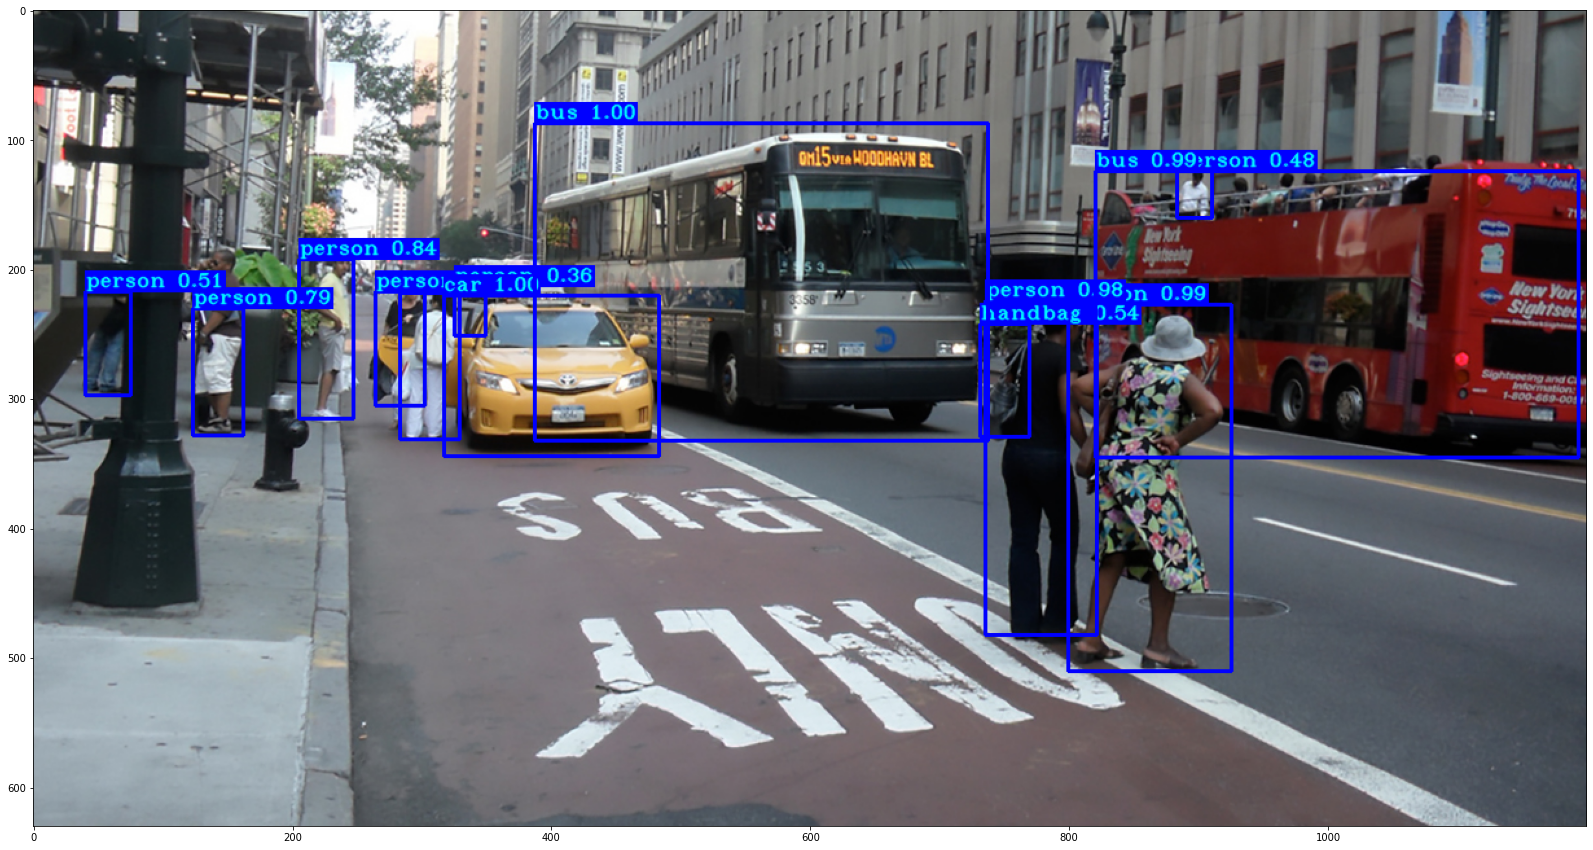

In [ ]:
image_path   = "./IMAGES/street.jpg"

image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

**Download checkpoint for faster training in next section**

In [ ]:
# already trained with MNIST for 10 epochs
!wget -P checkpoints https://github.com/tan14007/yolov3-mnist-materials/raw/main/yolov3_custom.data-00000-of-00001
!wget -P checkpoints https://github.com/tan14007/yolov3-mnist-materials/raw/main/yolov3_custom.index

--2021-09-05 10:14:36--  https://github.com/tan14007/yolov3-mnist-materials/raw/main/yolov3_custom.data-00000-of-00001
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/tan14007/yolov3-mnist-materials/main/yolov3_custom.data-00000-of-00001 [following]
--2021-09-05 10:14:36--  https://media.githubusercontent.com/media/tan14007/yolov3-mnist-materials/main/yolov3_custom.data-00000-of-00001
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246556051 (235M) [application/octet-stream]
Saving to: ‘checkpoints/yolov3_custom.data-00000-of-00001.1’

yolov3_custom.data- 100%[===================

**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files (run once):**

In [ ]:
!python tools/XML_to_YOLOv3.py

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/test
Dataset_names: []


**Prepare MNIST Dataset from provided train/test zip files (run once if haven't)** \\
This should take about 15 minutes

In [ ]:
!python mnist/make_data.py

Extracting all train files now...
Done!
Extracting all test files now...
Done!
=> /content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000001.jpg 96,16,124,44,4 1,319,29,347,3 226,139,282,195,6 180,293,236,349,6
=> /content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000002.jpg 35,194,57,216,9 56,5,70,19,7 98,133,112,147,9 147,283,259,395,9 116,107,200,191,6
=> /content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000003.jpg 64,60,86,82,0 158,211,172,225,5 200,11,256,67,4 367,40,395,68,7 236,231,292,287,3 116,64,228,176,7 13,250,125,362,4
=> /content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000004.jpg 115,373,137,395,0 291,5,347,61,3 354,293,396,335,9 354,104,410,160,1 286,155,328,197,2 196,83,224,111,7 158,295,242,379,8
=> /content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000005.jpg 4,198,18,212,8 294,281,406,393,8 197,283,281,367,3
=> /content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000006.jpg 22,216,64,

**Start training custom model:** \\
For demo purpose, please open `TensorFlow-2.x-YOLOv3/yolov3/configs.py` in your Google Drive and change `TRAIN_EPOCHS` to `2` and `TRAIN_FROM_CHECKPOINT` to `"checkpoints/yolov3_custom"` (after called [this cell](#scrollTo=CKp4LeCRcqlB&line=1&uniqifier=1)) \\
2 epochs should take about 10 minutes

In [ ]:
from train import *
tf.keras.backend.clear_session()
# You should see "2 checkpoints/yolov3_custom" as an output
print(TRAIN_EPOCHS, TRAIN_FROM_CHECKPOINT)
# start training
main()

2 checkpoints/yolov3_custom
GPUs []
epoch: 0 step:    2/250, lr:0.000000, giou_loss:   4.75, conf_loss:   4.82, prob_loss:   8.80, total_loss:  18.37
epoch: 0 step:    3/250, lr:0.000001, giou_loss:  25.08, conf_loss:  42.27, prob_loss:  20.34, total_loss:  87.68
epoch: 0 step:    4/250, lr:0.000001, giou_loss:  21.63, conf_loss:  31.66, prob_loss:  38.97, total_loss:  92.27
epoch: 0 step:    5/250, lr:0.000001, giou_loss:  29.37, conf_loss:  44.52, prob_loss:  42.82, total_loss: 116.71
epoch: 0 step:    6/250, lr:0.000001, giou_loss:  23.48, conf_loss:  36.95, prob_loss:  30.41, total_loss:  90.83
epoch: 0 step:    7/250, lr:0.000001, giou_loss:  19.89, conf_loss:  39.64, prob_loss:  42.24, total_loss: 101.77
epoch: 0 step:    8/250, lr:0.000002, giou_loss:  22.12, conf_loss:  41.37, prob_loss:  39.87, total_loss: 103.35
epoch: 0 step:    9/250, lr:0.000002, giou_loss:  32.23, conf_loss:  40.72, prob_loss:  35.21, total_loss: 108.15
epoch: 0 step:   10/250, lr:0.000002, giou_loss:  39

KeyboardInterrupt: ignored

In [ ]:
# list test images available
!ls ./mnist/mnist_test

**Create Yolo v3 custom model and load custom trained weights**

In [ ]:
yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

**Test the detection with `IMAGES/plate_2.jpg` image**

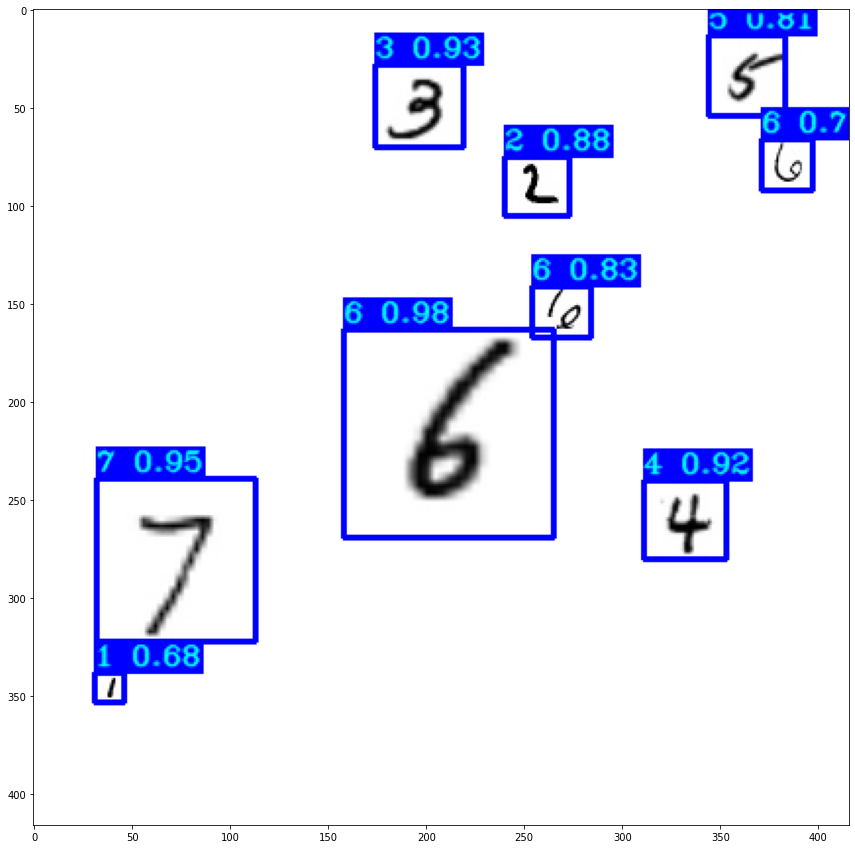

In [ ]:
image_path   = "./mnist/mnist_test/000001.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

# **You just trained your first Yolo v3 custom object detector on google colab, GOOD JOB!!**